In [ ]:
install.packages("scatterplot3d")

In [1]:
library("scatterplot3d")

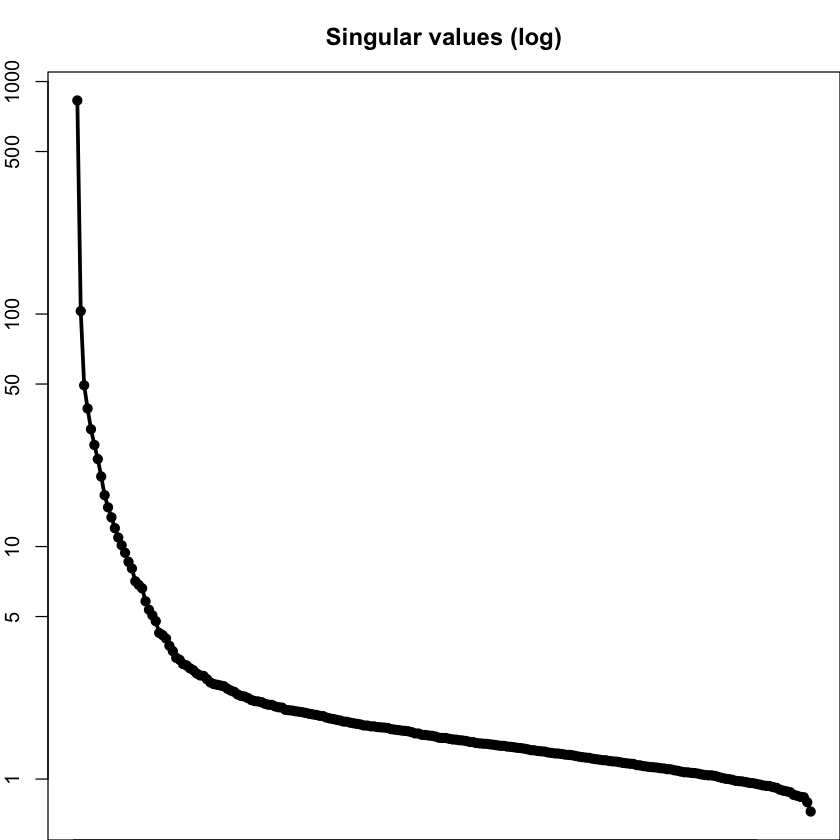

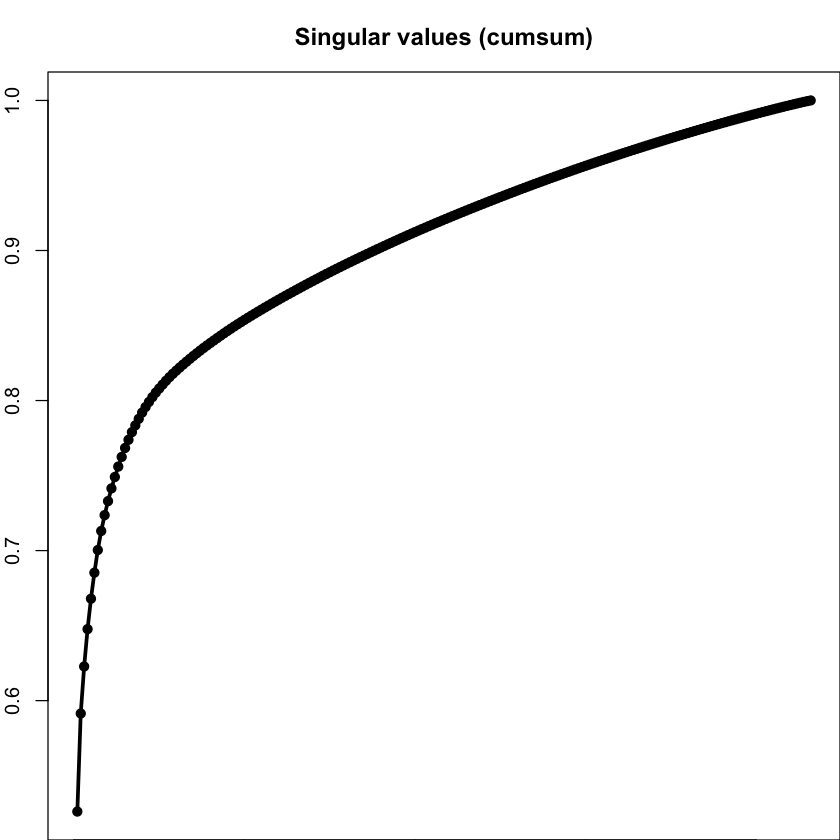

In [2]:
obs <- read.csv("../DATA/ovariancancer_obs.csv", header = FALSE, sep = ",", dec = ".")

con <- file("../DATA/ovariancancer_grp.csv",open="r")

grp <- c()

while ( TRUE ) {
    line = readLines(con, n = 1)
    if ( length(line) == 0 ) {
      break
    }
    
    grp <- append(grp, line)
  }

close(con)

res <- svd(obs)
VT <- t(res$v)

par(mfrow = c(1, 1), mar=c(0, 2, 3, 0))

plot(1:length(res$d), res$d, main="Singular values (log)", 
     xlab="", ylab="Singular Value", log="y", type="l", lwd=3)
points(1:length(res$d), res$d, pch=19)
plot(1:length(res$d), cumsum(res$d)/sum(res$d), main="Singular values (cumsum)", 
     xlab="", ylab="Singular Value", type="l", lwd=3)
points(1:length(res$d), cumsum(res$d)/sum(res$d), pch=19)


In [32]:
colors <- c("#0000FF", "#FF0000")
shapes = c(16, 17)

shapes <- shapes[as.numeric(as.factor(grp))]
colors <- colors[as.numeric(as.factor(grp))]

In [ ]:
# 1. Source the function
source('http://www.sthda.com/sthda/RDoc/functions/addgrids3d.r')

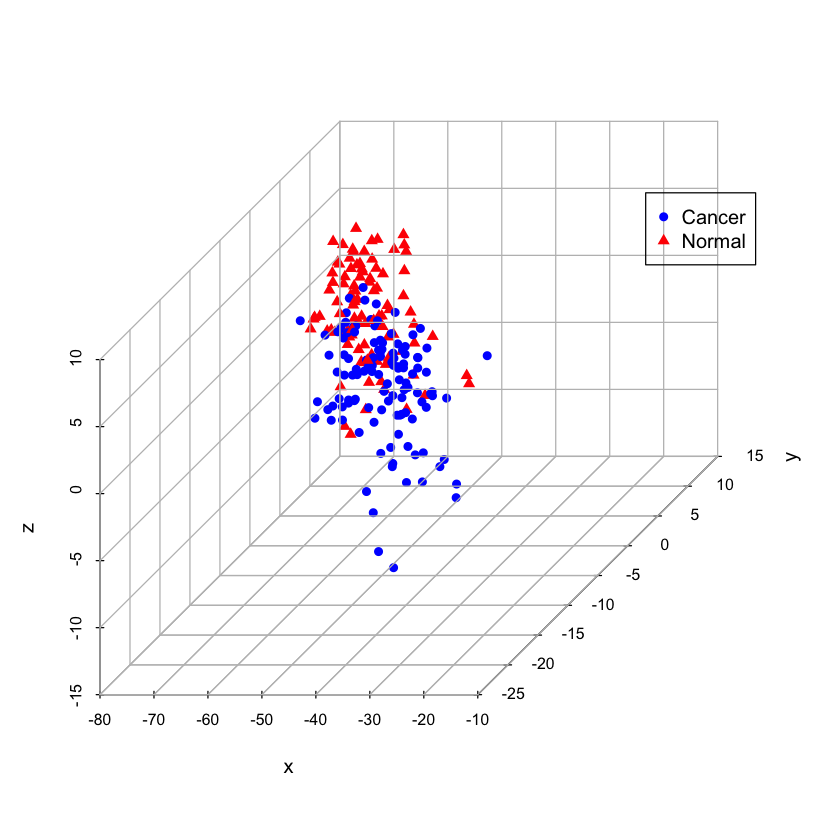

In [34]:
x1 <- VT[1,] %*% t(obs)
y1 <- VT[2,] %*% t(obs)
z1 <- VT[3,] %*% t(obs)

d <- data.frame(x = as.numeric(x1), y = as.numeric(y1), z = as.numeric(z1))

s3d <- scatterplot3d(d, pch = shapes, color=colors, box=F)
addgrids3d(d, grid = c("xy", "xz", "yz"))
legend(s3d$xyz.convert(-10, 3, 10), legend = levels(as.factor(grp)),
      col = c("#0000FF", "#FF0000"), pch = c(16,17))